# Bollinger Band
---

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
yf.pdr_override() # that's all it takes
from pandas_datareader import data as pdr

In [60]:
df = pdr.get_data_yahoo('SPY')
df.reset_index(inplace=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.799770,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.983273,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.038315,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.313566,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.423655,531500


In [61]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.799770,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.983273,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.038315,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.313566,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.423655,531500


In [62]:
# index reset
df.reset_index(inplace=True)

In [63]:
df['CODE'] = 'SPY'
price_df = df.loc[:,['Date','Adj Close']].copy()
price_df.head()

,Date,Adj Close
0,1993-01-29,25.799770
1,1993-02-01,25.983273
2,1993-02-02,26.038315
3,1993-02-03,26.313566
4,1993-02-04,26.423655


In [64]:
price_df.set_index(['Date'], inplace=True)
price_df.head()

,Adj Close
Date,
1993-01-29,25.799770
1993-02-01,25.983273
1993-02-02,26.038315
1993-02-03,26.313566
1993-02-04,26.423655



- Upper: center Band + 2 * 20일 MA 표준 편차 
- Center: 20일 이동 평균선 
- Lower: center Band - 2 * 20일 MA 표준 편차

In [65]:
# ['center']: 20 Days MA column
price_df['center'] = price_df['Adj Close'].rolling(20).mean()
price_df.iloc[18:25]

,Adj Close,center
Date,,
1993-02-25,26.038315,NaN
1993-02-26,26.075027,25.997031
1993-03-01,26.001619,26.007123
1993-03-02,26.386965,26.027308
1993-03-03,26.497063,26.050245
1993-03-04,26.350250,26.052080
1993-03-05,26.276848,26.044739


In [66]:
# upper Bollinger Band(+ 2)
price_df['ub'] = price_df['center'] + 2 * price_df['Adj Close'].rolling(20).std()

In [67]:
price_df.iloc[18:25]

,Adj Close,center,ub
Date,,,
1993-02-25,26.038315,NaN,NaN
1993-02-26,26.075027,25.997031,26.660818
1993-03-01,26.001619,26.007123,26.664388
1993-03-02,26.386965,26.027308,26.705936
1993-03-03,26.497063,26.050245,26.760705
1993-03-04,26.350250,26.052080,26.765584
1993-03-05,26.276848,26.044739,26.745047


In [68]:
# lower Bollinger Band
price_df['lb'] = price_df['center'] - 2 * price_df['Adj Close'].rolling(20).std()
price_df.iloc[18:25]

,Adj Close,center,ub,lb
Date,,,,
1993-02-25,26.038315,NaN,NaN,NaN
1993-02-26,26.075027,25.997031,26.660818,25.333244
1993-03-01,26.001619,26.007123,26.664388,25.349859
1993-03-02,26.386965,26.027308,26.705936,25.348680
1993-03-03,26.497063,26.050245,26.760705,25.339786
1993-03-04,26.350250,26.052080,26.765584,25.338575
1993-03-05,26.276848,26.044739,26.745047,25.344432


In [69]:
# 이동평균선 기간 및 표준 편차 값 설정
n = 20
sigma = 2

In [70]:
def bollinger_band(price_df, n, sigma):
    bb = price_df.copy()
    bb['center'] = price_df['Adj Close'].rolling(n).mean()
    bb['ub'] = bb['center'] + sigma * price_df['Adj Close'].rolling(20).std()
    bb['lb'] = bb['center'] - sigma * price_df['Adj Close'].rolling(20).std()
    return bb

In [71]:
bollinger = bollinger_band(price_df, n, sigma)

In [72]:
bollinger.iloc[18:25]

,Adj Close,center,ub,lb
Date,,,,
1993-02-25,26.038315,NaN,NaN,NaN
1993-02-26,26.075027,25.997031,26.660818,25.333244
1993-03-01,26.001619,26.007123,26.664388,25.349859
1993-03-02,26.386965,26.027308,26.705936,25.348680
1993-03-03,26.497063,26.050245,26.760705,25.339786
1993-03-04,26.350250,26.052080,26.765584,25.338575
1993-03-05,26.276848,26.044739,26.745047,25.344432


In [73]:
base_date = '2021-01-01'

In [74]:
sample = bollinger.loc[base_date:]
sample.head()

,Adj Close,center,ub,lb
Date,,,,
2021-01-04,366.387390,366.056871,371.399617,360.714125
2021-01-05,368.910828,366.208368,371.699864,360.716872
2021-01-06,371.116394,366.507738,372.390357,360.625118
2021-01-07,376.630249,367.029378,374.446308,359.612448
2021-01-08,378.776184,367.822533,376.645508,358.999557


In [75]:
book = sample[['Adj Close']].copy()
book['trade'] = '' # 거래내역
book.head()

,Adj Close,trade
Date,,
2021-01-04,366.387390,
2021-01-05,368.910828,
2021-01-06,371.116394,
2021-01-07,376.630249,
2021-01-08,378.776184,


- 볼린저 밴드를 이용해서 과매수/과매도 구간을 포착하는 지표로 활용
- 단기 매매에 효과적

In [76]:
def tradings(sample, book):
    for i in sample.index:
        if sample.loc[i, 'Adj Close'] > sample.loc[i, 'ub']: # 상단밴드 이탈시 동작 안함
            book.loc[i, 'trade'] = ''
        elif sample.loc[i, 'lb'] > sample.loc[i, 'Adj Close']: # 하반밴드 이탈시 매수
            if book.shift(1).loc[i, 'trade'] == 'buy':    # 이미 매수상태라면
                book.loc[i, 'trade'] = 'buy'     # 매수상태 유지
            else:
                book.loc[i, 'trade'] = 'buy'    
        elif sample.loc[i, 'ub'] >= sample.loc[i, 'Adj Close'] and sample.loc[i, 'Adj Close'] >= sample.loc[i, 'lb']: # 볼린저 밴드 안에 있을 시
            if book.shift(1).loc[i, 'trade'] == 'buy':
                book.loc[i, 'trade'] = 'buy'  # 매수상태 유지
            else:
                book.loc[i, 'trade'] = '' # 동작 안함
    return (book) 

In [77]:
book = tradings(sample,book)

In [78]:
book.tail(10)

,Adj Close,trade
Date,,
2021-08-06,442.489990,
2021-08-09,442.130005,
2021-08-10,442.679993,
2021-08-11,443.779999,
2021-08-12,445.109985,
2021-08-13,445.920013,
2021-08-16,446.970001,
2021-08-17,444.040009,
2021-08-18,439.179993,


- 전체 수익률 계산 함수
- 날짜 별 매수 신호가 있을때 Long 진입
- 이후 Long 포지션의 청산 조건 확인 후 수익률 계산
- 포지션이 정리 되면 매수, 매도금액을 저장하는 변수 초기화

In [79]:
def returns(book):
    # 손익 계산
    rtn = 1.0
    book['return'] = 1
    buy = 0.0
    sell = 0.0
    for i in book.index:
        if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':     # long 진입
            buy = book.loc[i, 'Adj Close']
            print('진입일 : ',i, 'long 진입가격 : ', buy)
        elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':     # long 청산
            sell = book.loc[i, 'Adj Close']
            rtn = (sell - buy) / buy + 1 # 손익 계산
            book.loc[i, 'return'] = rtn
            print('청산일 : ',i, 'long 진입가격 : ', buy, ' |  long 청산가격 : ', \
                  sell, ' | return:', round(rtn, 4))
    
        if book.loc[i, 'trade'] == '':     # zero position
            buy = 0.0
            sell = 0.0
    
    acc_rtn = 1.0
    for i in book.index:
        rtn = book.loc[i, 'return']
        acc_rtn = acc_rtn * rtn  # 누적 수익률 계산
        book.loc[i, 'acc return'] = acc_rtn

    print ('Accunulated return :', round(acc_rtn, 4))
    return (round(acc_rtn, 4))

In [80]:
print(returns(book))

진입일 :  2021-03-04 00:00:00 long 진입가격 :  374.2458801269531
청산일 :  2021-04-05 00:00:00 long 진입가격 :  374.2458801269531  |  long 청산가격 :  405.0348815917969  | return: 1.0823
진입일 :  2021-05-12 00:00:00 long 진입가격 :  404.0880126953125
청산일 :  2021-06-25 00:00:00 long 진입가격 :  404.0880126953125  |  long 청산가격 :  426.6099853515625  | return: 1.0557
Accunulated return : 1.1426
1.1426


## Regression to mean(BackTesting)
---
- 평균 회귀 전략 확인

In [81]:
import matplotlib.pylab as plt

<AxesSubplot:xlabel='Date'>

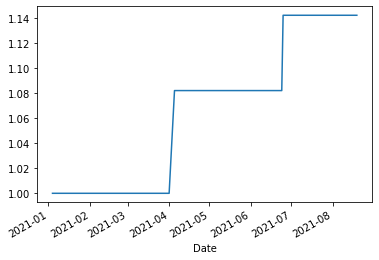

In [82]:
book['acc return'].plot()

In [83]:
book.tail()

,Adj Close,trade,return,acc return
Date,,,,
2021-08-13,445.920013,,1.0,1.14259
2021-08-16,446.970001,,1.0,1.14259
2021-08-17,444.040009,,1.0,1.14259
2021-08-18,439.179993,,1.0,1.14259
2021-08-19,438.230011,,1.0,1.14259
